In [10]:
import pandas as pd
import numpy as np
import librosa
import os
import matplotlib.pyplot as plt

%matplotlib inline

In [22]:
audio_data_path="/Users/gourimittal/Downloads/archive/audio"
metadata_path= "/Users/gourimittal/Downloads/archive/UrbanSound8K.csv"

In [20]:
import IPython.display as ipd
import librosa
import librosa.display

In [23]:
metadata= pd.read_csv(metadata_path)
print(metadata.head())

      slice_file_name    fsID  start        end  salience  fold  classID  \
0    100032-3-0-0.wav  100032    0.0   0.317551         1     5        3   
1  100263-2-0-117.wav  100263   58.5  62.500000         1     5        2   
2  100263-2-0-121.wav  100263   60.5  64.500000         1     5        2   
3  100263-2-0-126.wav  100263   63.0  67.000000         1     5        2   
4  100263-2-0-137.wav  100263   68.5  72.500000         1     5        2   

              class  
0          dog_bark  
1  children_playing  
2  children_playing  
3  children_playing  
4  children_playing  


In [25]:


print (sr)

22050


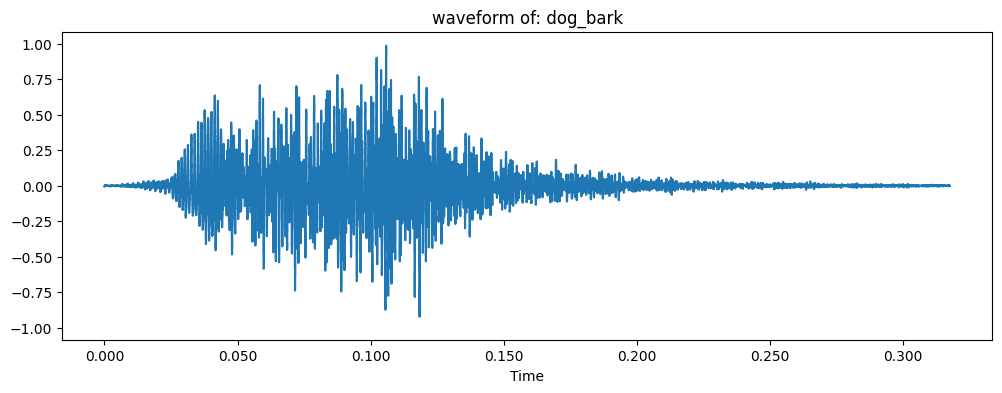

In [31]:
sample_file=metadata.iloc[0]
file_name=file_name = os.path.join(audio_data_path, 'fold' + str(sample_file['fold']), sample_file['slice_file_name'])
y,sr = librosa.load(file_name,sr=22050)

plt.figure(figsize=(12,4))
librosa.display.waveshow(y,sr=sr)
plt.title(f"waveform of: {sample_file['class']}")
plt.show()

In [34]:
def extract_features(file_name, n_mfcc=40):
    try:
        # Load audio, resampling to a standard rate (res_type='kaiser_fast' is for quality)
        audio, sample_rate = librosa.load(file_name, res_type='kaiser_fast')
        
        # 1. Extract the MFCCs
        # n_mfcc=40 means we calculate 40 coefficients per short time frame.
        mfccs = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=n_mfcc)
        
        # 2. Transpose and Calculate the MEAN (Crucial for ANN)
        # We take the average of the 40 coefficients across all time steps. 
        # This converts the 2D time-series into a single 1D vector (40 numbers).
        mfccs_processed = np.mean(mfccs.T, axis=0)
        
    except Exception as e:
        print(f"Error encountered while processing file: {file_name}. Error: {e}")
        return None
    
    return mfccs_processed

In [35]:
 mfccs_processed.shape


NameError: name 'mfccs_processed' is not defined

In [36]:
# Create an empty list to store the extracted features
all_features = []

print("Starting feature extraction. This will take a while...")
# Loop through each row in the metadata DataFrame
for index, row in metadata.iterrows():
    
    # Construct the full file path using the metadata columns and os.path.join
    file_name = os.path.join(
        audio_data_path, 
        'fold' + str(row["fold"]), 
        row["slice_file_name"]
    )
    
    # Get the class label (the sound type)
    class_label = row["class"]
    
    # Call the feature extraction function
    data = extract_features(file_name)
    
    # If feature extraction was successful, append the data
    if data is not None:
        # data is the 40-element MFCC array
        all_features.append([data, class_label, row["fold"]])
    
    # Optional: Print progress every 500 files
    if (index + 1) % 500 == 0:
        print(f"Processed {index + 1} files...")

# Convert the list of features into a final pandas DataFrame
features_df = pd.DataFrame(all_features, columns=['feature', 'class', 'fold'])

print("\n--- Feature Extraction Complete ---")
print("Features DataFrame Head:")
print(features_df.head())

Starting feature extraction. This will take a while...
Processed 500 files...
Processed 1000 files...
Processed 1500 files...
Processed 2000 files...
Processed 2500 files...
Processed 3000 files...
Processed 3500 files...


/opt/miniconda3/envs/urban_sound_env/lib/python3.9/site-packages/librosa/core/spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=1323
  warnings.warn(


Processed 4000 files...
Processed 4500 files...
Processed 5000 files...
Processed 5500 files...
Processed 6000 files...
Processed 6500 files...
Processed 7000 files...
Processed 7500 files...
Processed 8000 files...


/opt/miniconda3/envs/urban_sound_env/lib/python3.9/site-packages/librosa/core/spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=1103
  warnings.warn(
/opt/miniconda3/envs/urban_sound_env/lib/python3.9/site-packages/librosa/core/spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=1523
  warnings.warn(


Processed 8500 files...

--- Feature Extraction Complete ---
Features DataFrame Head:
                                             feature             class  fold
0  [-217.35526, 70.22339, -130.38527, -53.282898,...          dog_bark     5
1  [-424.09818, 109.34076, -52.919525, 60.86475, ...  children_playing     5
2  [-458.79114, 121.3842, -46.520653, 52.00812, -...  children_playing     5
3  [-413.89984, 101.66371, -35.42945, 53.036358, ...  children_playing     5
4  [-446.60352, 113.68541, -52.402218, 60.302044,...  children_playing     5
